#### Predicting liver disease using machine learning

About the dataset:
LINK: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)


This dataset contains samples of patients. This dataset contains 11 rows and 584 columns.
There are 10 features in this dataset and 1 result.
The dataset has 2 class outputs.


Expected Outcome: The task is to predict the disease with high accuracy rate with the help of list of symptoms provided by patient. Also to see which ML model performs the best for which disease and hence, make a comparitive study.

In [0]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

Data Collection

In [0]:
# Read CSV file liver_disease_dataset.csv to a dataframe object.

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('liver_disease_dataset.csv', delimiter = ',')

Saving liver_disease_dataset.csv to liver_disease_dataset (2).csv


In [0]:
#reading first few rows of the dataaset

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
df['Dataset'] = df['Dataset'].map({2:0,1:1})

In [0]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
#summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [0]:
#basic statistical details of the dataset

df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947015,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Data Preprocessing and Data Visualization

In [0]:
#Check if there are null values in the data, and if so, how many rows have null values.

df[df.isnull()==True].count()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [0]:
df.Dataset.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

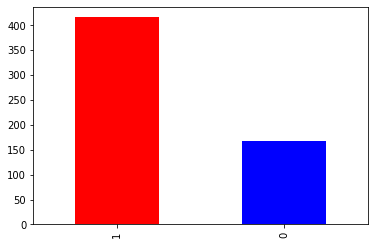

In [0]:
df.Dataset.value_counts().plot(kind="bar", color=["red", "blue"])

In [0]:
#Differentiating Categorical and Continuous values

categorical_val = []
continuous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

Age : [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
Gender : ['Female' 'Male']
Total_Bilirubin : [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
Direct_Bilirubin : [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  

In [0]:
categorical_val

['Gender', 'Dataset']

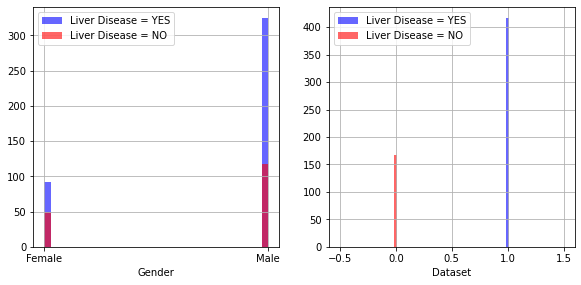

In [0]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Dataset"] == 1][column].hist(bins=35, color='blue', label='Liver Disease = YES', alpha=0.6)
    df[df["Dataset"] == 0][column].hist(bins=35, color='red', label='Liver Disease = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [0]:
continuous_val

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

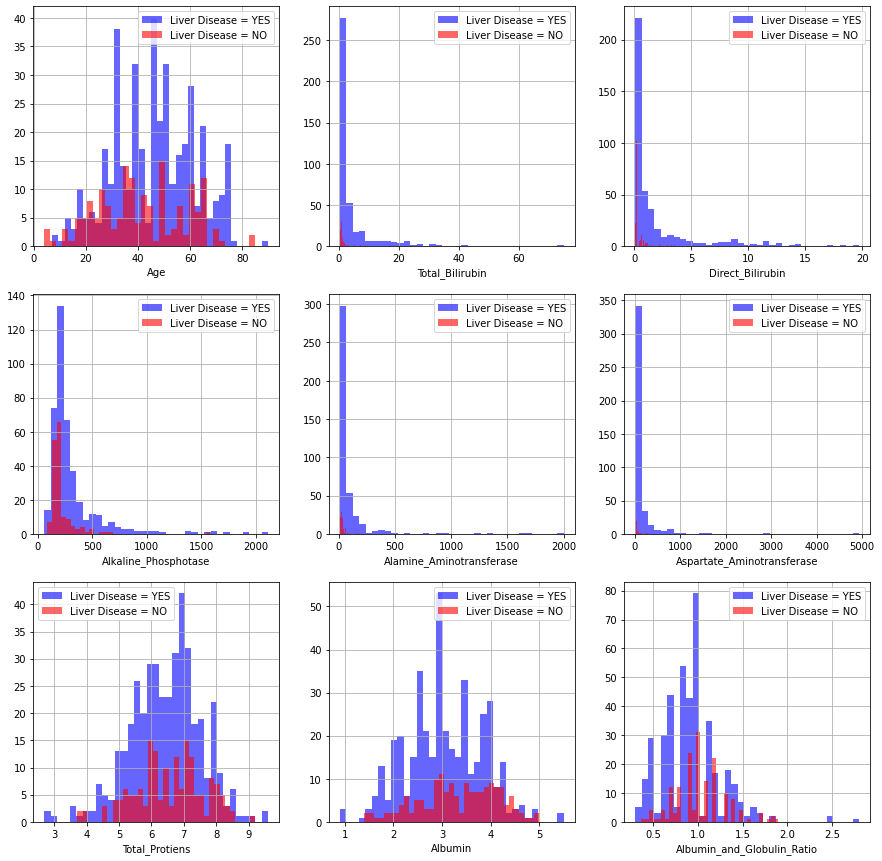

In [0]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Dataset"] == 1][column].hist(bins=35, color='blue', label='Liver Disease = YES', alpha=0.6)
    df[df["Dataset"] == 0][column].hist(bins=35, color='red', label='Liver Disease = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6efd263cf8>,
      dtype=object)

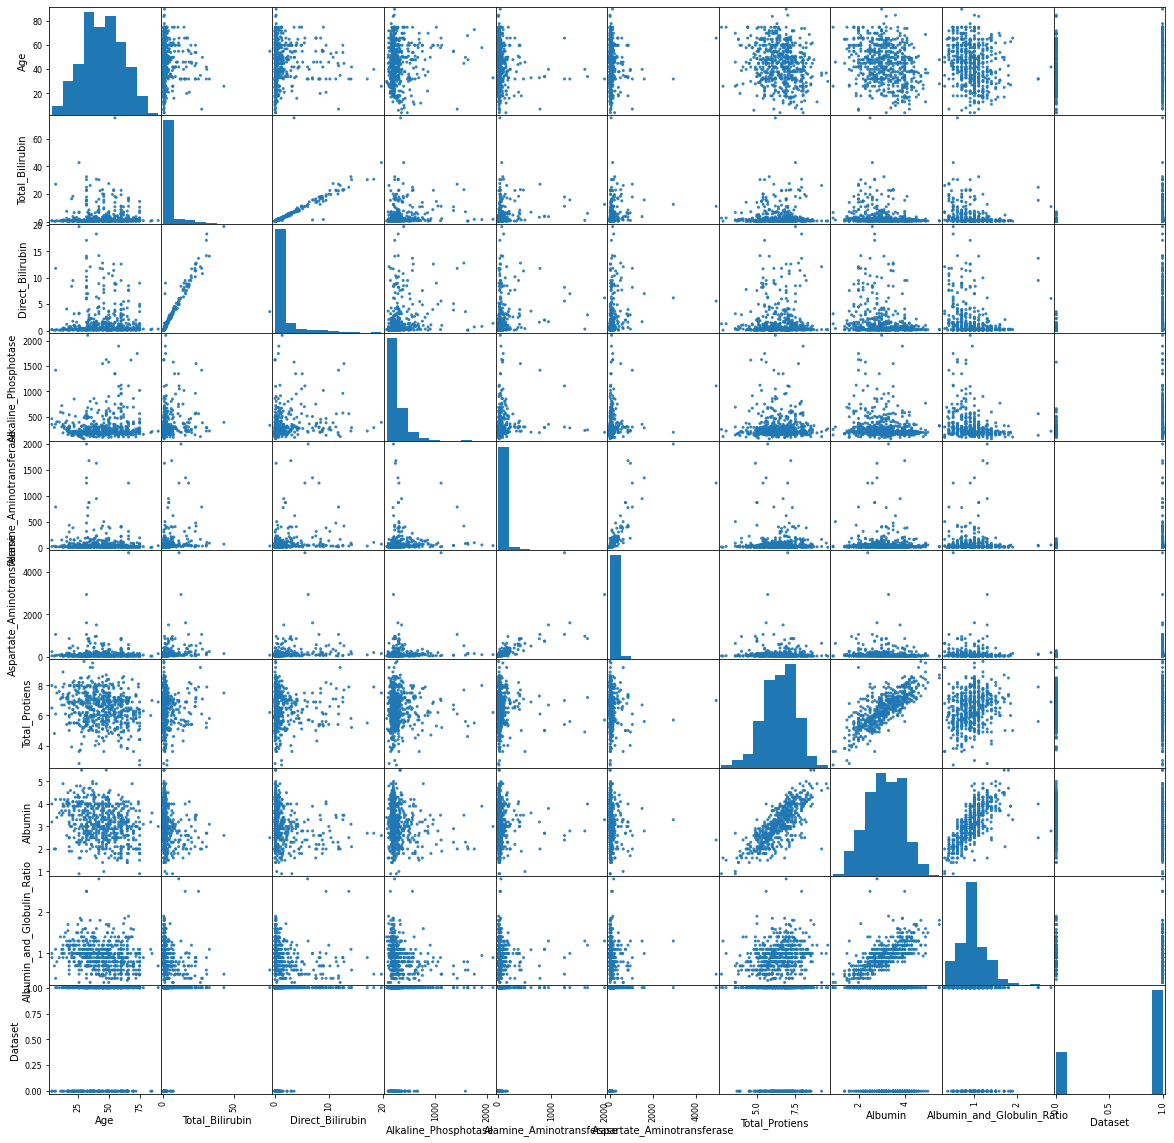

In [0]:
#Scatter Matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.9, figsize=(20,20), diagonal='hist')

In [0]:
#Correlation Coefficients between a pair of features.

pair_corr_coeff = df.corr()
print(pair_corr_coeff)

#Another style of displaying the above result

pair_corr_coeff.abs().style.background_gradient()

                                 Age  ...   Dataset
Age                         1.000000  ...  0.137351
Total_Bilirubin             0.011763  ...  0.220208
Direct_Bilirubin            0.007529  ...  0.246046
Alkaline_Phosphotase        0.080425  ...  0.184866
Alamine_Aminotransferase   -0.086883  ...  0.163416
Aspartate_Aminotransferase -0.019910  ...  0.151934
Total_Protiens             -0.187461  ... -0.035008
Albumin                    -0.265924  ... -0.161388
Albumin_and_Globulin_Ratio -0.216039  ... -0.162247
Dataset                     0.137351  ...  1.000000

[10 rows x 10 columns]


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,0.086883,0.019910,0.187461,0.265924,0.216039,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,0.008099,0.222250,0.206100,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,0.000139,0.228531,0.199941,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,0.028514,0.165453,0.233888,0.184866
Alamine_Aminotransferase,0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,0.042518,0.029742,0.002324,0.163416
Aspartate_Aminotransferase,0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,0.025645,0.085290,0.069985,0.151934
Total_Protiens,0.187461,0.008099,0.000139,0.028514,0.042518,0.025645,1.000000,0.784053,0.233873,0.035008
Albumin,0.265924,0.222250,0.228531,0.165453,0.029742,0.085290,0.784053,1.000000,0.686228,0.161388
Albumin_and_Globulin_Ratio,0.216039,0.206100,0.199941,0.233888,0.002324,0.069985,0.233873,0.686228,1.000000,0.162247
Dataset,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,0.035008,0.161388,0.162247,1.000000


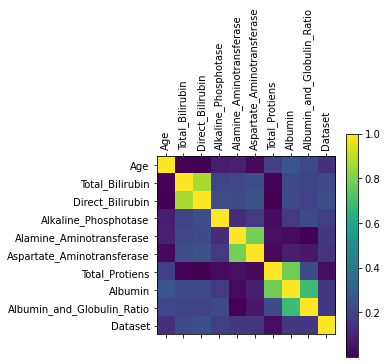

In [0]:
#Another style of displaying the correlation coefficients
#Create a color matrix plot of correlation coefficents of the pairs of features.

plt.matshow(np.abs(pair_corr_coeff))
plt.colorbar()
plt.xticks(range(len(pair_corr_coeff.columns)), pair_corr_coeff.columns, rotation='vertical');
plt.yticks(range(len(pair_corr_coeff.columns)), pair_corr_coeff.columns);

In [0]:
categorical_val.remove('Dataset')
dataset = pd.get_dummies(df, columns = categorical_val)

In [0]:
dataset.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [0]:
print(df.columns)
print(dataset.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("-------------------Training Result:-------------------\n\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print("------------------------------------------------------")        
        print("------------------------------------------------------\n\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("-------------------Testing Result:-------------------\n\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        print("------------------------------------------------------")        
        print("------------------------------------------------------\n")

Dividing Training data and Testing data

In [0]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Dataset', axis=1)
y = dataset.Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Machine Learning Models**

1. Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

-------------------Training Result:-------------------


Accuracy Score: 71.81%


Classification Report:	Precision Score: 73.32%
			Recall Score: 94.44%
			F1 score: 82.55%


Confusion Matrix: 
 [[ 21  99]
 [ 16 272]]

------------------------------------------------------
------------------------------------------------------


-------------------Testing Result:-------------------


Accuracy Score: 72.00%


Classification Report:	Precision Score: 75.48%
			Recall Score: 91.41%
			F1 score: 82.69%


Confusion Matrix: 
 [[  9  38]
 [ 11 117]]

------------------------------------------------------
------------------------------------------------------



In [0]:
test_score = accuracy_score(y_test, log_reg.predict(X_test)) * 100
train_score = accuracy_score(y_train, log_reg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.813725,72.0


In [0]:
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test)) * 100
test_precision = precision_score(y_test, log_reg.predict(X_test)) * 100
test_recall = recall_score(y_test, log_reg.predict(X_test)) * 100
test_f1 = f1_score(y_test, log_reg.predict(X_test)) * 100

train_accuracy = accuracy_score(y_train, log_reg.predict(X_train)) * 100
train_precision = precision_score(y_train, log_reg.predict(X_train)) * 100
train_recall = recall_score(y_train, log_reg.predict(X_train)) * 100
train_f1 = f1_score(y_train, log_reg.predict(X_train)) * 100

results_df1 = pd.DataFrame(data=[["Logistic Regression", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Training Precision %', 'Testing Precision %', 'Training Recall %', 'Testing Recall %', 'Training f1 score %', 'Testing f1 score %'])
results_df1

,Model,Training Accuracy %,Testing Accuracy %,Training Precision %,Testing Precision %,Training Recall %,Testing Recall %,Training f1 score %,Testing f1 score %
0,Logistic Regression,71.813725,72.0,73.315364,75.483871,94.444444,91.40625,82.549317,82.685512


2. Gaussian Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
print_score(gnb, X_train, y_train, X_test, y_test, train=True)
print_score(gnb, X_train, y_train, X_test, y_test, train=False)

-------------------Training Result:-------------------


Accuracy Score: 54.17%


Classification Report:	Precision Score: 94.69%
			Recall Score: 37.15%
			F1 score: 53.37%


Confusion Matrix: 
 [[114   6]
 [181 107]]

------------------------------------------------------
------------------------------------------------------


-------------------Testing Result:-------------------


Accuracy Score: 57.14%


Classification Report:	Precision Score: 98.18%
			Recall Score: 42.19%
			F1 score: 59.02%


Confusion Matrix: 
 [[46  1]
 [74 54]]

------------------------------------------------------
------------------------------------------------------



In [0]:
test_score = accuracy_score(y_test, gnb.predict(X_test)) * 100
train_score = accuracy_score(y_train, gnb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gaussian Naive Bayes", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.813725,72.000000
1,Gaussian Naive Bayes,54.166667,57.142857


In [0]:
test_accuracy = accuracy_score(y_test, gnb.predict(X_test)) * 100
test_precision = precision_score(y_test, gnb.predict(X_test)) * 100
test_recall = recall_score(y_test, gnb.predict(X_test)) * 100
test_f1 = f1_score(y_test, gnb.predict(X_test)) * 100

train_accuracy = accuracy_score(y_train, gnb.predict(X_train)) * 100
train_precision = precision_score(y_train, gnb.predict(X_train)) * 100
train_recall = recall_score(y_train, gnb.predict(X_train)) * 100
train_f1 = f1_score(y_train, gnb.predict(X_train)) * 100

results_df1_2 = pd.DataFrame(data=[["Gaussian Naive Bayes", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Training Precision %', 'Testing Precision %', 'Training Recall %', 'Testing Recall %', 'Training f1 score %', 'Testing f1 score %'])

results_df1 = results_df1.append(results_df1_2, ignore_index=True)
results_df1

,Model,Training Accuracy %,Testing Accuracy %,Training Precision %,Testing Precision %,Training Recall %,Testing Recall %,Training f1 score %,Testing f1 score %
0,Logistic Regression,71.813725,72.000000,73.315364,75.483871,94.444444,91.40625,82.549317,82.685512
1,Gaussian Naive Bayes,54.166667,57.142857,94.690265,98.181818,37.152778,42.18750,53.366584,59.016393


3. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print_score(rfc, X_train, y_train, X_test, y_test, train=True)
print_score(rfc, X_train, y_train, X_test, y_test, train=False)

-------------------Training Result:-------------------


Accuracy Score: 70.34%


Classification Report:	Precision Score: 70.52%
			Recall Score: 99.65%
			F1 score: 82.59%


Confusion Matrix: 
 [[  0 120]
 [  1 287]]

------------------------------------------------------
------------------------------------------------------


-------------------Testing Result:-------------------


Accuracy Score: 73.14%


Classification Report:	Precision Score: 73.14%
			Recall Score: 100.00%
			F1 score: 84.49%


Confusion Matrix: 
 [[  0  47]
 [  0 128]]

------------------------------------------------------
------------------------------------------------------



In [0]:
test_score = accuracy_score(y_test, rfc.predict(X_test)) * 100
train_score = accuracy_score(y_train, rfc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.813725,72.000000
1,Gaussian Naive Bayes,54.166667,57.142857
2,Random Forest Classifier,70.343137,73.142857


In [0]:
test_accuracy = accuracy_score(y_test, rfc.predict(X_test)) * 100
test_precision = precision_score(y_test, rfc.predict(X_test)) * 100
test_recall = recall_score(y_test, rfc.predict(X_test)) * 100
test_f1 = f1_score(y_test, rfc.predict(X_test)) * 100

train_accuracy = accuracy_score(y_train, rfc.predict(X_train)) * 100
train_precision = precision_score(y_train, rfc.predict(X_train)) * 100
train_recall = recall_score(y_train, rfc.predict(X_train)) * 100
train_f1 = f1_score(y_train, rfc.predict(X_train)) * 100

results_df1_2 = pd.DataFrame(data=[["Random Forest Classifier", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Training Precision %', 'Testing Precision %', 'Training Recall %', 'Testing Recall %', 'Training f1 score %', 'Testing f1 score %'])

results_df1 = results_df1.append(results_df1_2, ignore_index=True)
results_df1

,Model,Training Accuracy %,Testing Accuracy %,Training Precision %,Testing Precision %,Training Recall %,Testing Recall %,Training f1 score %,Testing f1 score %
0,Logistic Regression,71.813725,72.000000,73.315364,75.483871,94.444444,91.40625,82.549317,82.685512
1,Gaussian Naive Bayes,54.166667,57.142857,94.690265,98.181818,37.152778,42.18750,53.366584,59.016393
2,Random Forest Classifier,70.343137,73.142857,70.515971,73.142857,99.652778,100.00000,82.589928,84.488449


4. Support Vector Machine

In [0]:
from sklearn.svm import SVC

svc = SVC(gamma = 'auto')
svc = CalibratedClassifierCV(svc) 
svc.fit(X, y)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='auto', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [0]:
print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

-------------------Training Result:-------------------


Accuracy Score: 72.55%


Classification Report:	Precision Score: 72.68%
			Recall Score: 97.92%
			F1 score: 83.43%


Confusion Matrix: 
 [[ 14 106]
 [  6 282]]

------------------------------------------------------
------------------------------------------------------


-------------------Testing Result:-------------------


Accuracy Score: 77.14%


Classification Report:	Precision Score: 76.19%
			Recall Score: 100.00%
			F1 score: 86.49%


Confusion Matrix: 
 [[  7  40]
 [  0 128]]

------------------------------------------------------
------------------------------------------------------



In [0]:
test_score = accuracy_score(y_test, svc.predict(X_test)) * 100
train_score = accuracy_score(y_train, svc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.813725,72.000000
1,Gaussian Naive Bayes,54.166667,57.142857
2,Random Forest Classifier,70.343137,73.142857
3,Support Vector Machine,72.549020,77.142857


In [0]:
test_accuracy = accuracy_score(y_test, svc.predict(X_test)) * 100
test_precision = precision_score(y_test, svc.predict(X_test)) * 100
test_recall = recall_score(y_test, svc.predict(X_test)) * 100
test_f1 = f1_score(y_test, svc.predict(X_test)) * 100

train_accuracy = accuracy_score(y_train, svc.predict(X_train)) * 100
train_precision = precision_score(y_train, svc.predict(X_train)) * 100
train_recall = recall_score(y_train, svc.predict(X_train)) * 100
train_f1 = f1_score(y_train, svc.predict(X_train)) * 100

results_df1_2 = pd.DataFrame(data=[["Support Vector Machine", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Training Precision %', 'Testing Precision %', 'Training Recall %', 'Testing Recall %', 'Training f1 score %', 'Testing f1 score %'])

results_df1 = results_df1.append(results_df1_2, ignore_index=True)
results_df1

,Model,Training Accuracy %,Testing Accuracy %,Training Precision %,Testing Precision %,Training Recall %,Testing Recall %,Training f1 score %,Testing f1 score %
0,Logistic Regression,71.813725,72.000000,73.315364,75.483871,94.444444,91.40625,82.549317,82.685512
1,Gaussian Naive Bayes,54.166667,57.142857,94.690265,98.181818,37.152778,42.18750,53.366584,59.016393
2,Random Forest Classifier,70.343137,73.142857,70.515971,73.142857,99.652778,100.00000,82.589928,84.488449
3,Support Vector Machine,72.549020,77.142857,72.680412,76.190476,97.916667,100.00000,83.431953,86.486486


5. Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
print_score(dtc, X_train, y_train, X_test, y_test, train=True)
print_score(dtc, X_train, y_train, X_test, y_test, train=False)

-------------------Training Result:-------------------


Accuracy Score: 100.00%


Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%


Confusion Matrix: 
 [[120   0]
 [  0 288]]

------------------------------------------------------
------------------------------------------------------


-------------------Testing Result:-------------------


Accuracy Score: 100.00%


Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%


Confusion Matrix: 
 [[ 47   0]
 [  0 128]]

------------------------------------------------------
------------------------------------------------------



In [0]:
test_score = accuracy_score(y_test, dtc.predict(X_test)) * 100
train_score = accuracy_score(y_train, dtc.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,71.813725,72.000000
1,Gaussian Naive Bayes,54.166667,57.142857
2,Random Forest Classifier,70.343137,73.142857
3,Support Vector Machine,72.549020,77.142857
4,Decision Tree Classifier,100.000000,100.000000


In [0]:
test_accuracy = accuracy_score(y_test, dtc.predict(X_test)) * 100
test_precision = precision_score(y_test, dtc.predict(X_test)) * 100
test_recall = recall_score(y_test, dtc.predict(X_test)) * 100
test_f1 = f1_score(y_test, dtc.predict(X_test)) * 100

train_accuracy = accuracy_score(y_train, dtc.predict(X_train)) * 100
train_precision = precision_score(y_train, dtc.predict(X_train)) * 100
train_recall = recall_score(y_train, dtc.predict(X_train)) * 100
train_f1 = f1_score(y_train, dtc.predict(X_train)) * 100

results_df1_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Training Precision %', 'Testing Precision %', 'Training Recall %', 'Testing Recall %', 'Training f1 score %', 'Testing f1 score %'])

results_df1 = results_df1.append(results_df1_2, ignore_index=True)
results_df1

,Model,Training Accuracy %,Testing Accuracy %,Training Precision %,Testing Precision %,Training Recall %,Testing Recall %,Training f1 score %,Testing f1 score %
0,Logistic Regression,71.813725,72.000000,73.315364,75.483871,94.444444,91.40625,82.549317,82.685512
1,Gaussian Naive Bayes,54.166667,57.142857,94.690265,98.181818,37.152778,42.18750,53.366584,59.016393
2,Random Forest Classifier,70.343137,73.142857,70.515971,73.142857,99.652778,100.00000,82.589928,84.488449
3,Support Vector Machine,72.549020,77.142857,72.680412,76.190476,97.916667,100.00000,83.431953,86.486486
4,Decision Tree Classifier,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


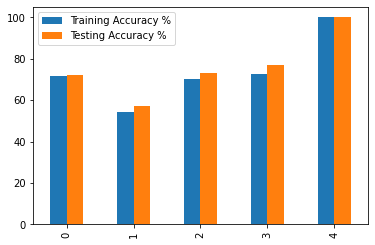

In [0]:
results_df.plot(kind='bar')

<Figure size 3600x3600 with 0 Axes>

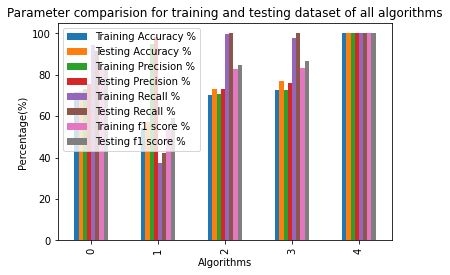

<Figure size 3600x3600 with 0 Axes>

In [0]:
graph = results_df1.plot(kind='bar',title='Parameter comparision for training and testing dataset of all algorithms')
graph.set_ylabel('Percentage(%)')
graph.set_xlabel('Algorithms')
plt.figure(figsize = (50,50))

In [0]:
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test)) * 100
test_precision = precision_score(y_test, log_reg.predict(X_test)) * 100
test_recall = recall_score(y_test, log_reg.predict(X_test)) * 100
test_f1 = f1_score(y_test, log_reg.predict(X_test)) * 100

results_df2 = pd.DataFrame(data=[["Logistic Regression", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=['Model', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing f1 score %'])
results_df2

,Model,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing f1 score %
0,Logistic Regression,72.0,75.483871,91.40625,82.685512


In [0]:
test_accuracy = accuracy_score(y_test, gnb.predict(X_test)) * 100
test_precision = precision_score(y_test, gnb.predict(X_test)) * 100
test_recall = recall_score(y_test, gnb.predict(X_test)) * 100
test_f1 = f1_score(y_test, gnb.predict(X_test)) * 100

results_df2_2 = pd.DataFrame(data=[["Gaussian Naive Bayes", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=['Model', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing f1 score %'])

results_df2 = results_df2.append(results_df2_2, ignore_index=True)
results_df2

,Model,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing f1 score %
0,Logistic Regression,72.000000,75.483871,91.40625,82.685512
1,Gaussian Naive Bayes,57.142857,98.181818,42.18750,59.016393


In [0]:
test_accuracy = accuracy_score(y_test, rfc.predict(X_test)) * 100
test_precision = precision_score(y_test, rfc.predict(X_test)) * 100
test_recall = recall_score(y_test, rfc.predict(X_test)) * 100
test_f1 = f1_score(y_test, rfc.predict(X_test)) * 100

results_df2_2 = pd.DataFrame(data=[["Random Forest Classifier", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=['Model', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing f1 score %'])

results_df2 = results_df2.append(results_df2_2, ignore_index=True)
results_df2

,Model,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing f1 score %
0,Logistic Regression,72.000000,75.483871,91.40625,82.685512
1,Gaussian Naive Bayes,57.142857,98.181818,42.18750,59.016393
2,Random Forest Classifier,73.142857,73.142857,100.00000,84.488449


In [0]:
test_accuracy = accuracy_score(y_test, svc.predict(X_test)) * 100
test_precision = precision_score(y_test, svc.predict(X_test)) * 100
test_recall = recall_score(y_test, svc.predict(X_test)) * 100
test_f1 = f1_score(y_test, svc.predict(X_test)) * 100

results_df2_2 = pd.DataFrame(data=[["Support Vector Machine", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=['Model', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing f1 score %'])

results_df2 = results_df2.append(results_df2_2, ignore_index=True)
results_df2

,Model,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing f1 score %
0,Logistic Regression,72.000000,75.483871,91.40625,82.685512
1,Gaussian Naive Bayes,57.142857,98.181818,42.18750,59.016393
2,Random Forest Classifier,73.142857,73.142857,100.00000,84.488449
3,Support Vector Machine,77.142857,76.190476,100.00000,86.486486


In [0]:
test_accuracy = accuracy_score(y_test, dtc.predict(X_test)) * 100
test_precision = precision_score(y_test, dtc.predict(X_test)) * 100
test_recall = recall_score(y_test, dtc.predict(X_test)) * 100
test_f1 = f1_score(y_test, dtc.predict(X_test)) * 100

results_df2_2 = pd.DataFrame(data=[["Decision tree Classifier", test_accuracy, test_precision, test_recall, test_f1]], 
                          columns=['Model', 'Testing Accuracy %', 'Testing Precision %', 'Testing Recall %', 'Testing f1 score %'])

results_df2 = results_df2.append(results_df2_2, ignore_index=True)
results_df2

,Model,Testing Accuracy %,Testing Precision %,Testing Recall %,Testing f1 score %
0,Logistic Regression,72.000000,75.483871,91.40625,82.685512
1,Gaussian Naive Bayes,57.142857,98.181818,42.18750,59.016393
2,Random Forest Classifier,73.142857,73.142857,100.00000,84.488449
3,Support Vector Machine,77.142857,76.190476,100.00000,86.486486
4,Decision tree Classifier,100.000000,100.000000,100.00000,100.000000


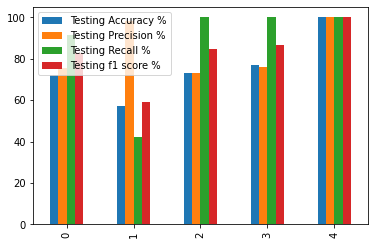

In [0]:
results_df2.plot(kind = 'bar')

In [0]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

#Get predicted probabilities
y_score1 = log_reg.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_score1, pos_label = 1)
roc_auc1 = roc_auc_score(y_test, y_score1)

y_score2 = gnb.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds = roc_curve(y_test, y_score2, pos_label = 1)
roc_auc2 = roc_auc_score(y_test, y_score2)

y_score3 = rfc.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_score3, pos_label = 1)
roc_auc3 = roc_auc_score(y_test, y_score3)

y_score4 = svc.predict_proba(X_test)[:,1]
fpr4, tpr4, thresholds = roc_curve(y_test, y_score4, pos_label = 1)
roc_auc4 = roc_auc_score(y_test, y_score4)

y_score5 = dtc.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds = roc_curve(y_test, y_score5, pos_label = 1)
roc_auc5 = roc_auc_score(y_test, y_score5)


print("AUC of ROC Curve: [Logistic Regression]", roc_auc1)
print("AUC of ROC Curve: [Gaussian Naive Bayes]", roc_auc2)
print("AUC of ROC Curve: [Random Forest Classifier]", roc_auc3)
print("AUC of ROC Curve: [Support Vector Machine]", roc_auc4)
print("AUC of ROC Curve: [Decision Tree Classifier]", roc_auc5)

AUC of ROC Curve: [Logistic Regression] 0.7805851063829787
AUC of ROC Curve: [Gaussian Naive Bayes] 0.7529920212765958
AUC of ROC Curve: [Random Forest Classifier] 0.7689494680851064
AUC of ROC Curve: [Support Vector Machine] 0.8532247340425533
AUC of ROC Curve: [Decision Tree Classifier] 1.0


Text(0.5, 0, 'False Positive Rate')

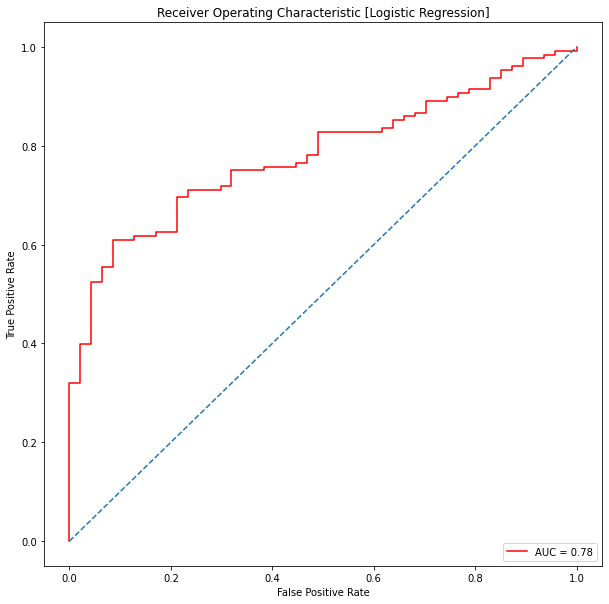

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic [Logistic Regression]')
plt.plot(fpr1,tpr1, color='red',label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

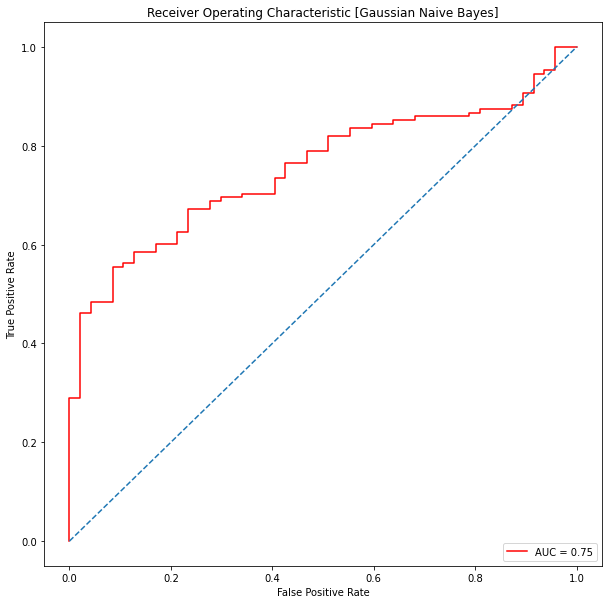

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic [Gaussian Naive Bayes]')
plt.plot(fpr2,tpr2, color='red',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

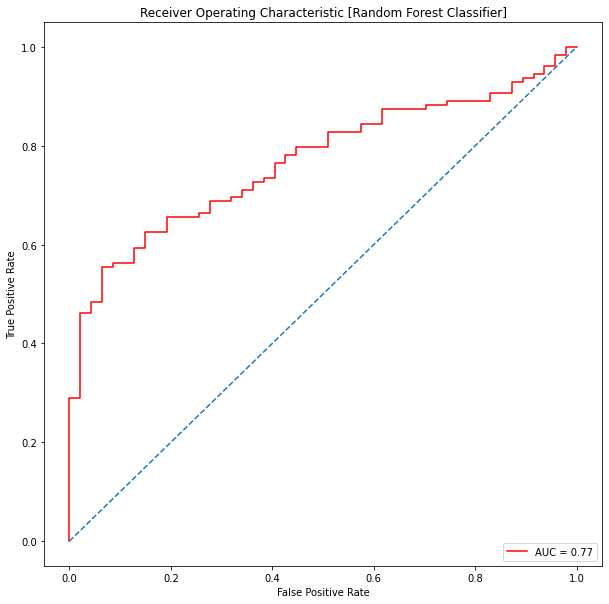

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic [Random Forest Classifier]')
plt.plot(fpr3,tpr3, color='red',label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

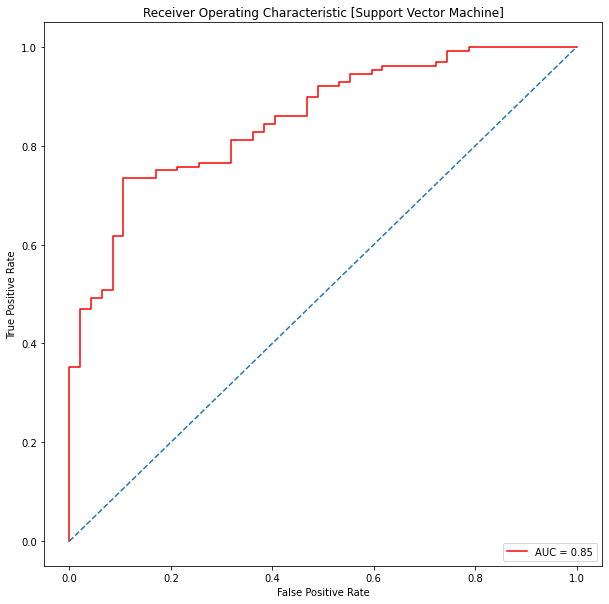

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic [Support Vector Machine]')
plt.plot(fpr4,tpr4, color='red',label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

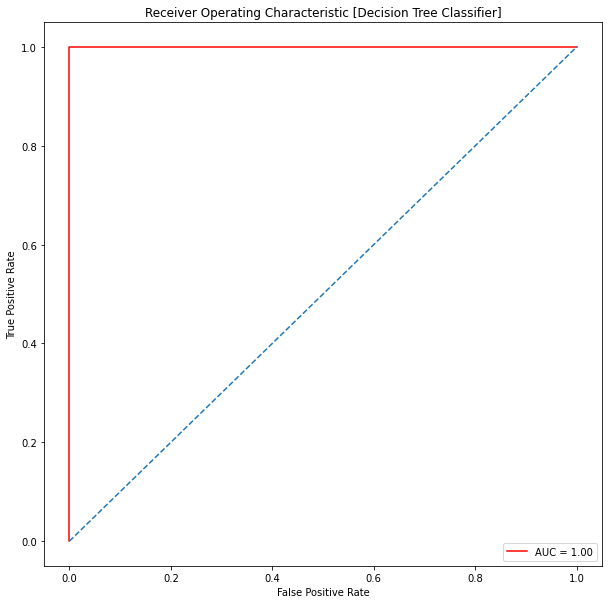

In [0]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic [Decision Tree Classifier]')
plt.plot(fpr5,tpr5, color='red',label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')